<a href="https://colab.research.google.com/github/shubhamnawani99/stocks-analysis/blob/master/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#4 importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [16]:
#defining path and reading csv file
path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/TCS.csv"
tcs = pd.read_csv(path)
tcs['14 Day MA'] = tcs['Close Price'].rolling(window=14).mean()
tcs['30 Day STD'] = tcs['Close Price'].rolling(window=20).std()
tcs['Upper Band'] = tcs['14 Day MA'] + (tcs['30 Day STD'] * 2)
tcs['Lower Band'] = tcs['14 Day MA'] - (tcs['30 Day STD'] * 2)
tcs = tcs.dropna()
tcs['Mid Band'] = (tcs['Upper Band']+tcs['Lower Band'])/2
tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,74.401631,2310.281834,2012.675309,2161.478571
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,69.643943,2310.648600,2032.072829,2171.360714
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,67.073082,2309.739022,2041.446692,2175.592857
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,65.064738,2306.008047,2045.749096,2175.878571


In [17]:
def select_buy(tcs):
    if (tcs['Close Price'] < tcs['Lower Band']):
        return "Buy"
    if (tcs['Close Price'] > tcs['Lower Band']) and (tcs['Close Price'] < tcs['Mid Band']):
        return "Hold Buy/ Liquidate Short"
    if (tcs['Close Price'] > tcs['Mid Band']) and (tcs['Close Price'] < tcs['Upper Band']):
        return "Hold Short/ Liquidate Buy"
    if (tcs['Close Price'] > tcs['Upper Band']):
        return "Short"
    
tcs = tcs.assign(Call = tcs.apply(select_buy, axis=1))
tcs

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
19,TCS,EQ,09-Jun-2017,2521.60,2520.00,2547.40,2486.00,2518.60,2507.00,2513.28,1574017,3.955950e+09,83931,599286,38.07,2572.610714,71.824613,2716.259941,2428.961488,2572.610714,Hold Buy/ Liquidate Short
20,TCS,EQ,12-Jun-2017,2507.00,2497.00,2512.90,2470.40,2484.90,2487.20,2487.48,813253,2.022948e+09,44849,306655,37.71,2570.146429,60.249637,2690.645703,2449.647154,2570.146429,Hold Buy/ Liquidate Short
21,TCS,EQ,13-Jun-2017,2487.20,2465.00,2481.10,2447.00,2450.00,2451.55,2464.89,587707,1.448635e+09,52410,268108,45.62,2562.460714,58.090647,2678.642008,2446.279421,2562.460714,Hold Buy/ Liquidate Short
22,TCS,EQ,14-Jun-2017,2451.55,2455.00,2476.00,2455.00,2465.40,2470.20,2469.41,744571,1.838651e+09,42987,456486,61.31,2551.432143,56.909942,2665.252026,2437.612259,2551.432143,Hold Buy/ Liquidate Short
23,TCS,EQ,15-Jun-2017,2470.20,2469.00,2469.70,2405.00,2410.00,2411.20,2427.94,1498599,3.638509e+09,65157,1140716,76.12,2539.500000,64.820537,2669.141074,2409.858926,2539.500000,Hold Buy/ Liquidate Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,TCS,EQ,07-May-2019,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,2163.53,2201698,4.763441e+09,86096,975603,44.31,2161.478571,74.401631,2310.281834,2012.675309,2161.478571,Hold Buy/ Liquidate Short
494,TCS,EQ,08-May-2019,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,2151.85,1824895,3.926902e+09,77713,781526,42.83,2171.360714,69.643943,2310.648600,2032.072829,2171.360714,Hold Buy/ Liquidate Short
495,TCS,EQ,09-May-2019,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,2166.98,2264162,4.906405e+09,106297,1251459,55.27,2175.592857,67.073082,2309.739022,2041.446692,2175.592857,Hold Buy/ Liquidate Short
496,TCS,EQ,10-May-2019,2172.55,2175.00,2192.00,2125.85,2130.25,2135.80,2161.83,2039633,4.409349e+09,85446,873181,42.81,2175.878571,65.064738,2306.008047,2045.749096,2175.878571,Hold Buy/ Liquidate Short


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_X = tcs[['Upper Band','Lower Band','Mid Band','Close Price']]
transfomed = le.fit_transform(tcs[['Call']])
train_Y = transfomed.reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
import sklearn as sk  
from sklearn.linear_model import LogisticRegression    
import os

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9582

In [20]:
from sklearn import svm  

SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

Support Vector Machines


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5491

In [21]:
import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Random Forests


0.6555

In [22]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4)

Neural Networks


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5365

In [23]:
titan_path = "https://raw.githubusercontent.com/shubhamnawani99/stocks-analysis/master/Large_Cap/TITAN.csv"
titan = pd.read_csv(titan_path)
titan

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TITAN,EQ,15-May-2017,495.00,489.65,490.00,472.40,486.00,483.65,479.93,3897357,1.870465e+09,52478,1722661,44.20
1,TITAN,EQ,16-May-2017,483.65,486.00,491.00,480.80,490.00,488.30,487.32,1308863,6.378316e+08,33942,563667,43.07
2,TITAN,EQ,17-May-2017,488.30,490.00,490.10,477.30,481.00,481.75,482.25,859054,4.142814e+08,26686,448314,52.19
3,TITAN,EQ,18-May-2017,481.75,479.00,482.60,470.05,470.85,471.65,474.78,811219,3.851526e+08,24621,438716,54.08
4,TITAN,EQ,19-May-2017,471.65,475.00,479.50,460.35,469.65,471.15,469.05,1022479,4.795891e+08,27225,263561,25.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,TITAN,EQ,07-May-2019,1082.85,1097.80,1105.00,1083.00,1090.00,1086.50,1094.54,2605643,2.851972e+09,83154,507973,19.50
492,TITAN,EQ,08-May-2019,1086.50,1090.00,1100.00,1067.85,1096.80,1088.70,1085.83,3336769,3.623149e+09,92788,472241,14.15
493,TITAN,EQ,09-May-2019,1088.70,1100.00,1110.00,1088.70,1103.20,1104.45,1099.15,4362293,4.794807e+09,131781,751092,17.22
494,TITAN,EQ,10-May-2019,1104.45,1108.00,1137.85,1094.30,1129.45,1132.10,1117.09,3032624,3.387712e+09,101440,1044911,34.46


In [24]:
titan['%chg op_cl'] = ((titan['Close Price'] - titan['Open Price'])/(titan['Close Price']))*100
titan['%chg lw_hg'] = ((titan['Close Price'] - titan['High Price'])/(titan['Low Price']))*100
titan['%chg 5dymean'] = titan['Close Price'].pct_change().dropna().rolling(5).mean()
titan['%chg 5dystd'] = titan['Close Price'].pct_change().dropna().rolling(5).std()
titan = titan.dropna()
titan

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,TITAN,EQ,22-May-2017,471.15,474.00,483.75,472.20,481.90,481.40,478.30,1725108,8.251277e+08,25751,777453,45.07,1.537183,-0.497670,-0.000814,0.017197
6,TITAN,EQ,23-May-2017,481.40,478.65,485.60,472.95,475.85,478.35,479.94,1651642,7.926900e+08,38743,766712,46.42,-0.062716,-1.532932,-0.004004,0.016232
7,TITAN,EQ,24-May-2017,478.35,474.25,478.95,460.10,470.45,469.20,469.91,1477366,6.942299e+08,35081,959757,64.96,-1.076300,-2.119105,-0.005147,0.017230
8,TITAN,EQ,25-May-2017,469.20,471.10,471.85,461.00,464.00,463.90,466.31,974154,4.542545e+08,24584,557552,57.23,-1.552059,-1.724512,-0.003213,0.015463
9,TITAN,EQ,26-May-2017,463.90,464.80,477.95,462.90,471.00,473.45,469.18,1594613,7.481631e+08,44946,695755,43.63,1.827014,-0.972132,0.001116,0.018871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,TITAN,EQ,07-May-2019,1082.85,1097.80,1105.00,1083.00,1090.00,1086.50,1094.54,2605643,2.851972e+09,83154,507973,19.50,-1.040037,-1.708218,-0.008798,0.028567
492,TITAN,EQ,08-May-2019,1086.50,1090.00,1100.00,1067.85,1096.80,1088.70,1085.83,3336769,3.623149e+09,92788,472241,14.15,-0.119408,-1.058201,-0.012094,0.025405
493,TITAN,EQ,09-May-2019,1088.70,1100.00,1110.00,1088.70,1103.20,1104.45,1099.15,4362293,4.794807e+09,131781,751092,17.22,0.402915,-0.509782,-0.005679,0.027618
494,TITAN,EQ,10-May-2019,1104.45,1108.00,1137.85,1094.30,1129.45,1132.10,1117.09,3032624,3.387712e+09,101440,1044911,34.46,2.128787,-0.525450,-0.001885,0.030759


In [25]:
arr = []
val = []
for value in titan['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
titan['Action'] = pd.DataFrame(val)
titan = titan.dropna()
titan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,TITAN,EQ,22-May-2017,471.15,474.00,483.75,472.20,481.90,481.40,478.30,1725108,8.251277e+08,25751,777453,45.07,1.537183,-0.497670,-0.000814,0.017197,-1.0
6,TITAN,EQ,23-May-2017,481.40,478.65,485.60,472.95,475.85,478.35,479.94,1651642,7.926900e+08,38743,766712,46.42,-0.062716,-1.532932,-0.004004,0.016232,1.0
7,TITAN,EQ,24-May-2017,478.35,474.25,478.95,460.10,470.45,469.20,469.91,1477366,6.942299e+08,35081,959757,64.96,-1.076300,-2.119105,-0.005147,0.017230,-1.0
8,TITAN,EQ,25-May-2017,469.20,471.10,471.85,461.00,464.00,463.90,466.31,974154,4.542545e+08,24584,557552,57.23,-1.552059,-1.724512,-0.003213,0.015463,1.0
9,TITAN,EQ,26-May-2017,463.90,464.80,477.95,462.90,471.00,473.45,469.18,1594613,7.481631e+08,44946,695755,43.63,1.827014,-0.972132,0.001116,0.018871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,TITAN,EQ,12-Apr-2019,1105.05,1107.00,1107.95,1094.00,1095.80,1097.00,1100.27,1499571,1.649940e+09,57794,729210,48.63,-0.911577,-1.000914,-0.001696,0.004788,1.0
479,TITAN,EQ,15-Apr-2019,1097.00,1102.00,1102.00,1088.00,1089.00,1090.15,1094.01,1116346,1.221292e+09,34071,401797,35.99,-1.087006,-1.089154,-0.002583,0.005207,-1.0
480,TITAN,EQ,16-Apr-2019,1090.15,1093.10,1124.75,1092.40,1124.00,1120.05,1112.77,2144260,2.386068e+09,92416,585186,27.29,2.406143,-0.430245,0.003962,0.014032,-1.0
481,TITAN,EQ,18-Apr-2019,1120.05,1125.95,1129.50,1113.50,1123.90,1125.40,1122.97,1609911,1.807885e+09,88597,612496,38.05,-0.048872,-0.368208,0.004617,0.013964,1.0


In [26]:
from sklearn import preprocessing
train_X = titan[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = titan[['Action']]

import sklearn as sk  
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Random Forests


0.6192

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


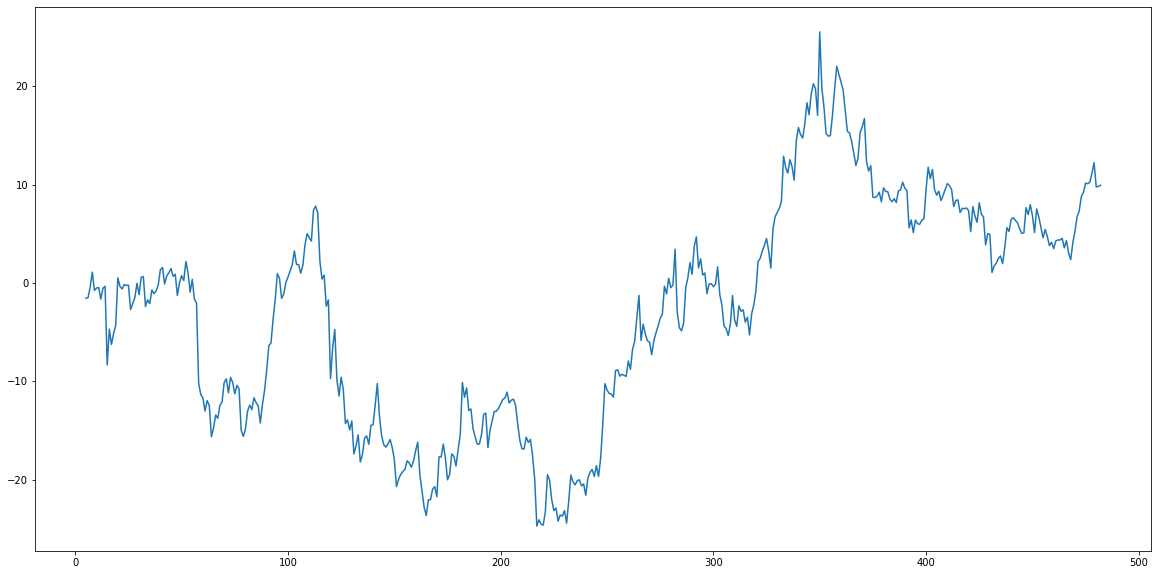

In [27]:
titan['Net Cummulative Returns'] = (((titan['Open Price'] - titan['Close Price'])/(titan['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(titan['Net Cummulative Returns'])